In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uppered/upper.csv


In [89]:
df = pd.read_csv('/kaggle/input/uppered/upper.csv',header = None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174
0,0,-0.214777,-0.074414,0.079668,-0.041953,-0.715294,0.043155,0.754480,0.628223,-0.074455,...,0.088765,0.285463,-0.060605,-0.542769,-0.006594,0.665262,-0.015711,-0.667007,-0.013797,0.368727
1,0,-0.253997,0.000337,0.060563,-0.101104,-0.701834,0.070198,0.748214,0.656058,0.016878,...,0.182359,-0.046342,-0.233167,-0.234710,0.183400,0.591095,-0.059619,-0.819383,-0.283455,0.414261
2,0,-0.212620,-0.136841,0.113312,0.014819,-0.714882,-0.012742,0.720049,0.666651,-0.012994,...,0.020312,0.042942,-0.171825,-0.373853,-0.104966,0.448661,0.347881,-0.296482,-0.369788,-0.097517
3,0,-0.156624,-0.255746,0.086175,0.086967,-0.657194,0.011942,0.792931,0.718432,-0.084970,...,-0.142067,0.143729,-0.000996,-0.482060,-0.256660,0.559800,0.520810,-0.381071,-0.506321,-0.038203
4,0,-0.212018,0.003571,-0.026051,-0.032036,-0.683312,-0.024696,0.778626,0.821851,0.083669,...,-0.057536,0.141625,-0.370610,-0.451844,0.315462,0.651035,-0.119629,-0.642190,-0.087899,0.252129


In [90]:
df.shape

(2136, 1175)

In [91]:
df.values[df.isnull().sum(axis=1) >= 1]

array([], shape=(0, 1175), dtype=float64)

In [92]:
pel_class = np.unique(df[0])
pel_class

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [93]:
pel_value = [sum(df[0]==pel_class[0]),
             sum(df[0]==pel_class[1]),
            sum(df[0]==pel_class[2]),
            sum(df[0]==pel_class[3]),
            sum(df[0]==pel_class[4]),
            sum(df[0]==pel_class[5]),
            sum(df[0]==pel_class[6]),
            sum(df[0]==pel_class[7]),
            sum(df[0]==pel_class[8]),
            sum(df[0]==pel_class[9]),
            sum(df[0]==pel_class[10]),
            sum(df[0]==pel_class[11]),
            sum(df[0]==pel_class[12]),
            sum(df[0]==pel_class[13]),
            sum(df[0]==pel_class[14])]
pel_value

[343, 87, 29, 13, 52, 105, 2, 2, 741, 433, 91, 62, 163, 4, 9]

In [94]:
y = df[0].values
X = df.drop([0],axis = 1).values

In [95]:
X = np.array(X)
y = np.array(y)

In [96]:
allclass = np.unique(y)
allclassnumber = [sum(y==eachclass) for eachclass in allclass]
allclassnumber

[343, 87, 29, 13, 52, 105, 2, 2, 741, 433, 91, 62, 163, 4, 9]

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [100]:
X_train_norm.shape

(1366, 1174)

In [101]:
num_label = len(np.unique(y_train))
y_train_multi = (np.arange(num_label) == y_train[:,None]).astype(np.float32)
y_train_multi

y_val_multi = (np.arange(num_label) == y_val[:,None]).astype(np.float32)
y_val_multi

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [102]:
import tensorflow as tf

In [103]:
tf.compat.v1.reset_default_graph() # Clear Model
np.random.seed(1) # Fix Randomness
tf.compat.v1.random.set_random_seed(1) # Fix Randomness
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(400, activation='relu', input_shape=(1174,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(num_label, activation='softmax')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               470000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_4 (Dense)              (None, 15)                765       
Total params: 588,665
Trainable params: 588,665
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
train_acc = list()
val_acc = list()
for i in range(0,500):
  history = model.fit(X_train_norm, y_train_multi, epochs= 1, batch_size = 100, validation_data= (X_val_norm, y_val_multi))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

14/14 [==============================] - 0s 9ms/step - loss: 0.0771 - accuracy: 0.9773 - val_loss: 0.2549 - val_accuracy: 0.9211


14/14 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 0.9846 - val_loss: 0.2793 - val_accuracy: 0.9298


14/14 [==============================] - 0s 9ms/step - loss: 0.0303 - accuracy: 0.9890 - val_loss: 0.4379 - val_accuracy: 0.8977


14/14 [==============================] - 0s 9ms/step - loss: 7.9543e-05 - accuracy: 1.0000 - val_loss: 0.3008 - val_accuracy: 0.9444


14/14 [==============================] - 0s 9ms/step - loss: 3.0878e-05 - accuracy: 1.0000 - val_loss: 0.3328 - val_accuracy: 0.9357


14/14 [==============================] - 0s 9ms/step - loss: 1.5941e-05 - accuracy: 1.0000 - val_loss: 0.3530 - val_accuracy: 0.9357


14/14 [==============================] - 0s 9ms/step - loss: 8.5505e-06 - accuracy: 1.0000 - val_loss: 0.3712 - val_accuracy: 0.9357


14/14 [==============================] - 0s 9ms/step - loss: 5.1329e-06 - accuracy: 1.0000 - val_loss: 0.3846 - val_accuracy: 0.9386


14/14 [==============================] - 0s 9ms/step - loss: 4.9313e-06 - accuracy: 1.0000 - val_loss: 0.3854 - val_accuracy: 0.9386


In [106]:
history.history

{'loss': [4.93131256007473e-06],
 'accuracy': [1.0],
 'val_loss': [0.38538816571235657],
 'val_accuracy': [0.9385964870452881]}

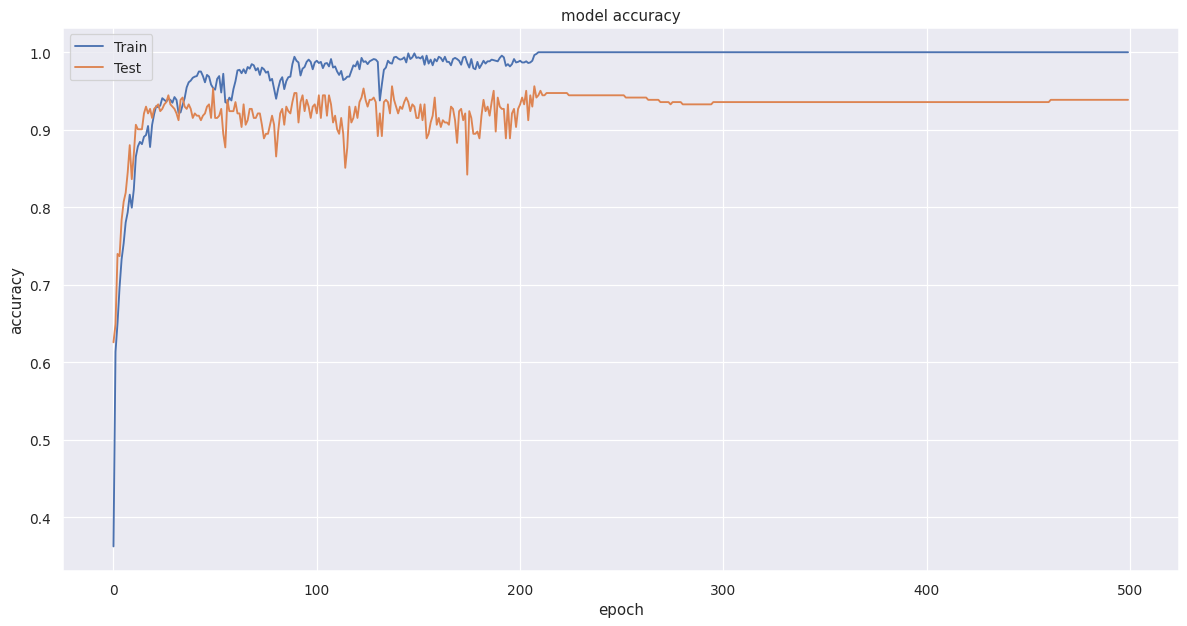

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [108]:
y_predict = model.predict(X_test_norm)
y_predict = np.argmax(y_predict, 1)
sum(y_predict == y_test)/len(y_test)

0.9345794392523364

In [109]:
df_test = pd.read_csv('https://drive.google.com/uc?export=download&id=1rwIn9ZuMrS8mDm3SxJ9Hp3X8eUPeoRmi',header = None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174
0,0,-0.288798,0.123559,-0.145930,-0.215309,-0.185400,0.392191,0.387001,0.109418,-0.053896,...,-0.083072,-0.180611,-0.054263,-0.090253,-0.092374,0.204258,0.172720,-0.127758,-0.073426,-0.062349
1,0,-0.310982,0.278796,0.020278,-0.580068,-0.194813,0.513178,0.054633,-0.091677,0.446404,...,-0.249165,0.612952,0.460862,-0.594491,-0.101955,0.473182,-0.270727,-0.241867,0.267820,-0.319167
2,0,-0.232586,-0.001626,0.012946,-0.436545,-0.077329,0.669403,0.233532,-0.176750,0.085733,...,0.189612,0.061643,0.020043,0.020403,-0.160364,0.088831,0.255118,-0.239033,-0.312695,0.103348
3,0,-0.410512,0.074891,-0.350108,0.175275,0.275028,0.188904,0.001418,-0.026880,-0.095250,...,0.220428,0.527499,0.107231,-0.578609,-0.307208,0.289125,0.225836,-0.025417,-0.041300,-0.205327
4,0,-0.281948,0.228064,0.072771,-0.434250,-0.370780,0.324552,0.145079,0.034085,0.321535,...,-0.082343,0.070518,-0.496565,-0.673805,0.208622,0.616389,0.076365,-0.175746,-0.037616,-0.208103


In [110]:
yt = df_test[0].values
Xt = df_test.drop([0],axis = 1).values

In [ ]:
X_test = scaler.transform(Xt)

In [112]:
y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, 1)
sum(y_predict == yt)/len(yt)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: 'bool' object is not iterable

In [113]:
len(yt)

762

In [ ]:
len(y_predict)